In [1]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import sparse

/home/minhang/miniconda3/envs/mds_responder_analysis/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/minhang/miniconda3/envs/mds_responder_analysis/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/minhang/miniconda3/envs/mds_responder_analysis/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/minhang/miniconda3/envs/mds_responder_analysis/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/minhang/miniconda3/envs/mds_

In [2]:
def plot_adata_umaps(adata_path, title_prefix):
    """
    Loads an AnnData object, computes UMAP, and plots UMAPs colored by different annotations.
    
    For AnnData objects from 'transformed_data.h5ad', it assumes adata.X is the latent
    representation and computes neighbors directly on it. For other adatas, it runs
    PCA before computing neighbors.
    """
    print(f"--- Processing: {title_prefix} ---")
    print(f"Loading adata from: {adata_path}")

    if not os.path.exists(adata_path):
        print(f"File not found: {adata_path}")
        return

    try:
        adata = ad.read_h5ad(adata_path)
        print("AnnData dimensions:", adata.shape)

        # Compute UMAP if not already present
        if 'X_umap' not in adata.obsm:
            print("Calculating UMAP...")
            if 'transformed_data' in adata_path:
                # For transformed data, use the existing embedding in X
                sc.pp.neighbors(adata, use_rep='X')
            else:
                # For processed data, run PCA first
                sc.tl.pca(adata, svd_solver='arpack')
                sc.pp.neighbors(adata)
            sc.tl.umap(adata)

        color_columns = ['predicted.annotation', 'batch', 'Tech', 'patient', 'predicted.pseudotime']
        
        # Check which columns are available for plotting
        available_columns = [col for col in color_columns if col in adata.obs.columns]
        if not available_columns:
            print("None of the specified columns for coloring are in adata.obs. Skipping plotting.")
            return

        # Create subplots for each available column
        n_plots = len(available_columns)
        fig, axes = plt.subplots(1, n_plots, figsize=(n_plots * 5 + 2, 4))
        if n_plots == 1:
            axes = [axes] # Ensure axes is iterable for a single plot
        fig.suptitle(title_prefix, fontsize=16)

        for i, col in enumerate(available_columns):
            sc.pl.umap(adata, color=col, ax=axes[i], show=False, title=f"{col}")

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except Exception as e:
        print(f"An error occurred while processing {adata_path}: {e}")


--- Processing: Input Adata ---
Loading adata from: /home/minhang/mds_project/data/cohort_adata/adata_mrd_preprocessed_aug14.h5ad
AnnData dimensions: (69801, 30916)
Calculating UMAP...


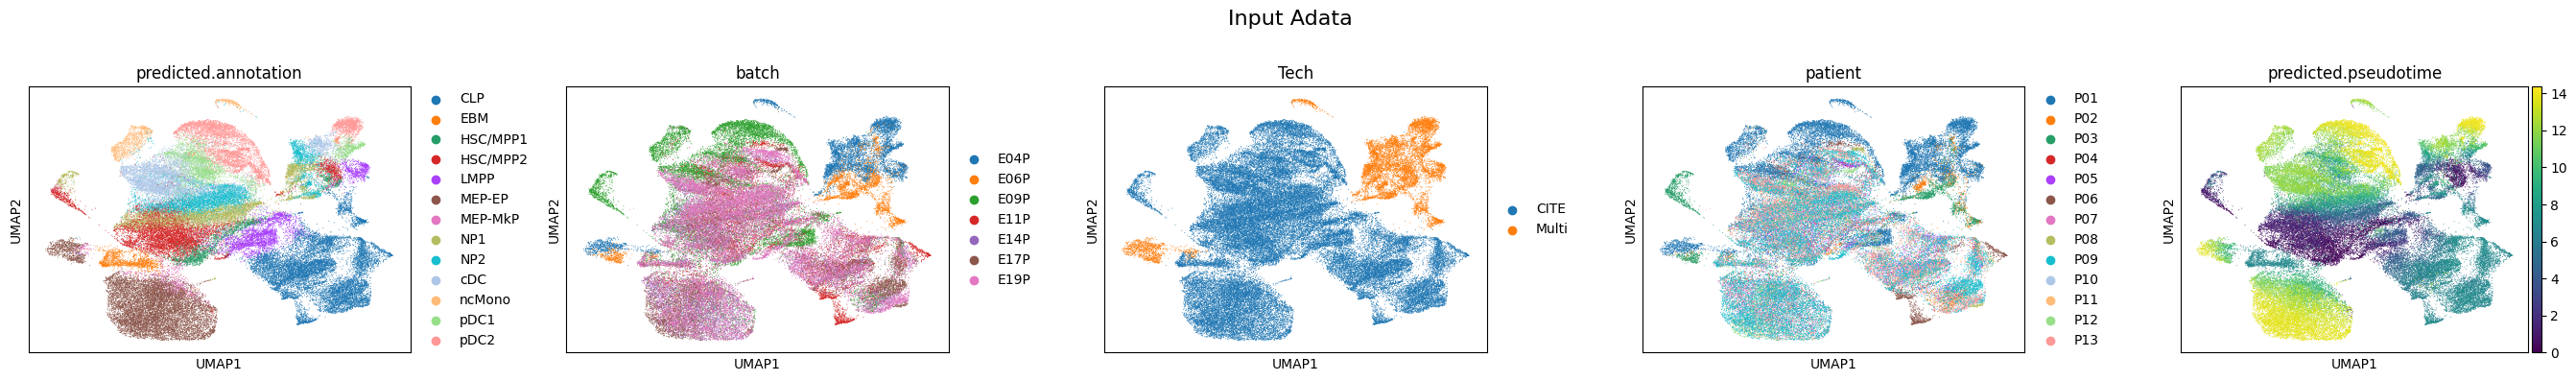

--- Processing: Exp1 Processed ---
Loading adata from: /home/minhang/mds_project/sc_classification/experiments/20250814_221408_fa_100_none_all_filtered_394c18e2/preprocessing/adata_processed.h5ad
AnnData dimensions: (69801, 10950)
Calculating UMAP...


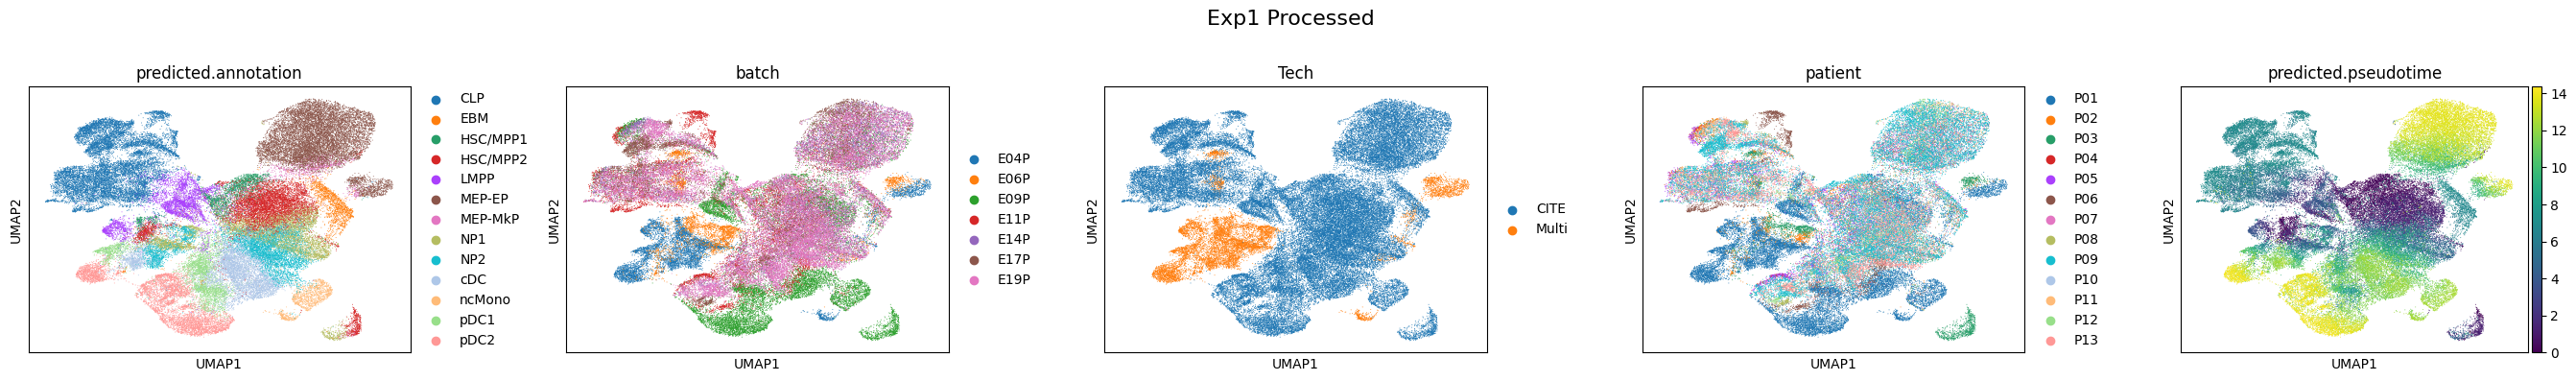

--- Processing: Exp1 Transformed ---
Loading adata from: /home/minhang/mds_project/sc_classification/experiments/20250814_221408_fa_100_none_all_filtered_394c18e2/models/fa_100/transformed_data.h5ad
AnnData dimensions: (69801, 10950)
Calculating UMAP...


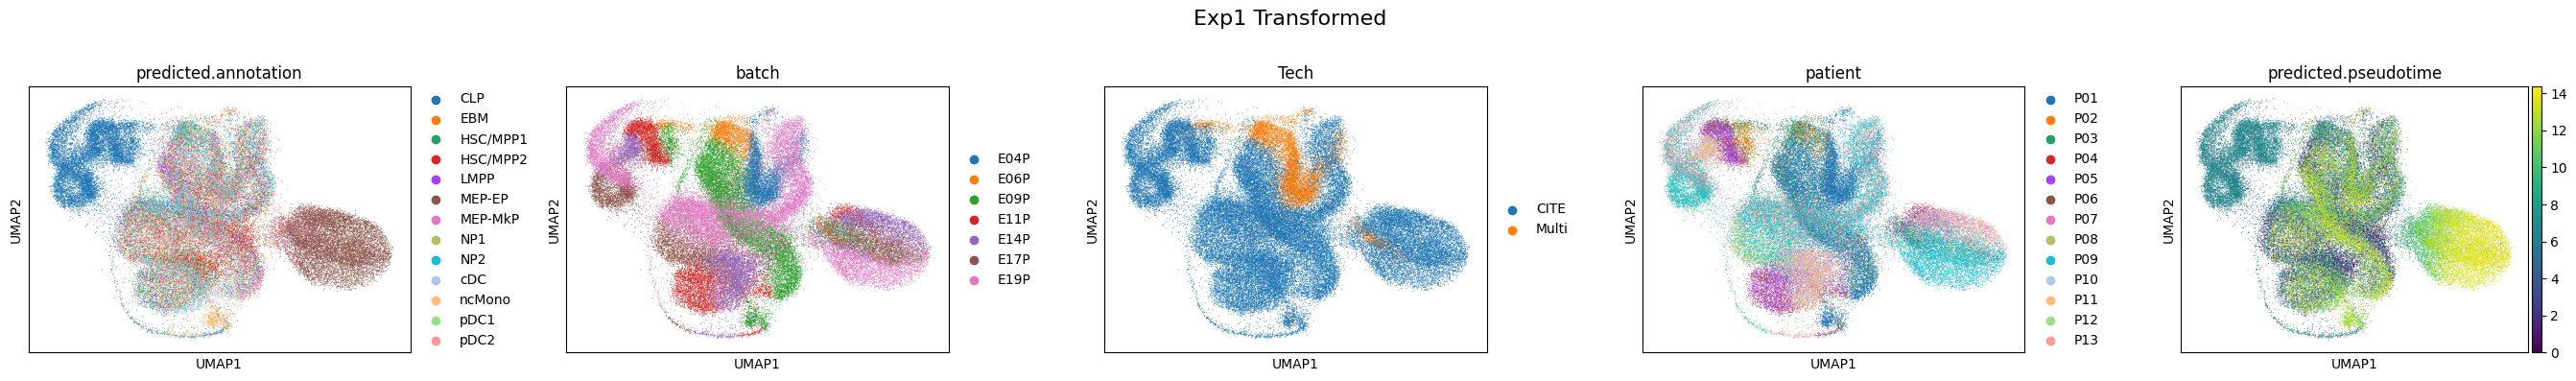

--- Processing: Exp2 Processed ---
Loading adata from: /home/minhang/mds_project/sc_classification/experiments/20250815_004248_fa_100_random_all_filtered_f77df82f/preprocessing/adata_processed.h5ad
AnnData dimensions: (69801, 10950)
Calculating UMAP...


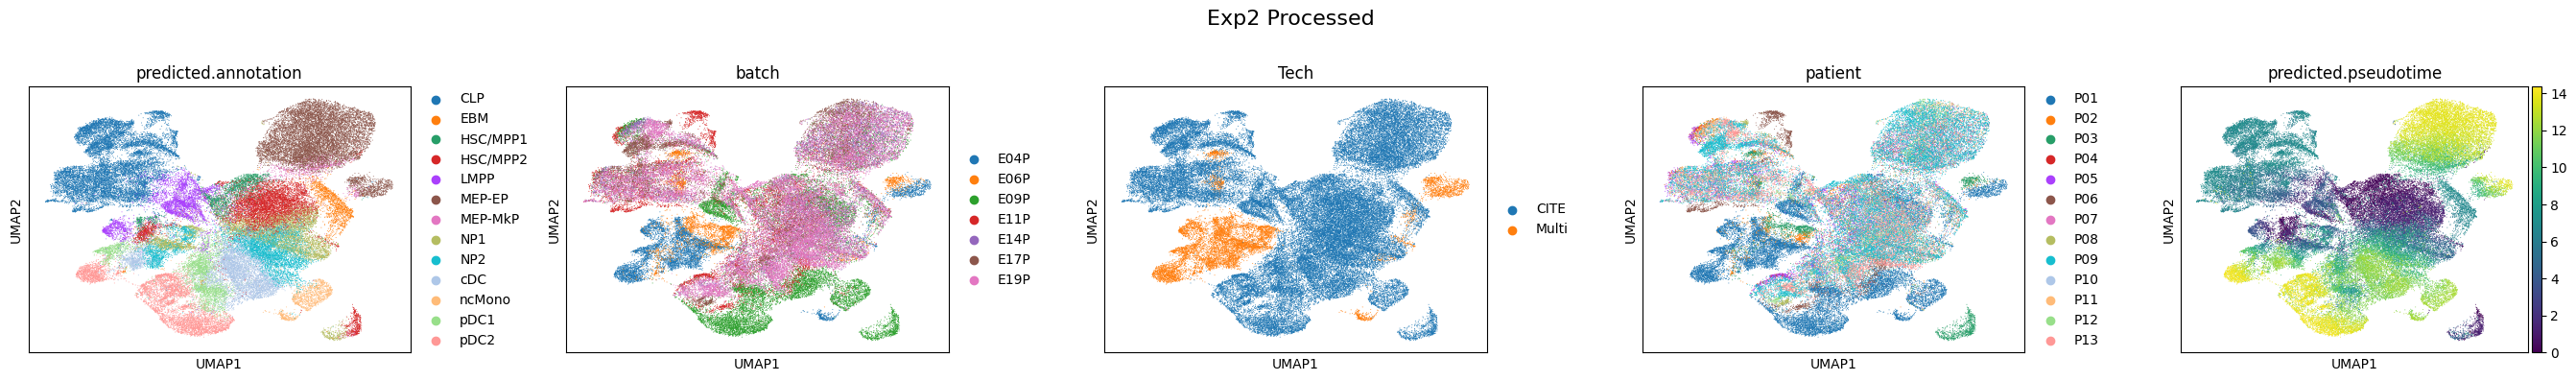

--- Processing: Exp2 Transformed ---
Loading adata from: /home/minhang/mds_project/sc_classification/experiments/20250815_004248_fa_100_random_all_filtered_f77df82f/models/fa_100/transformed_data.h5ad
AnnData dimensions: (69801, 10950)
Calculating UMAP...


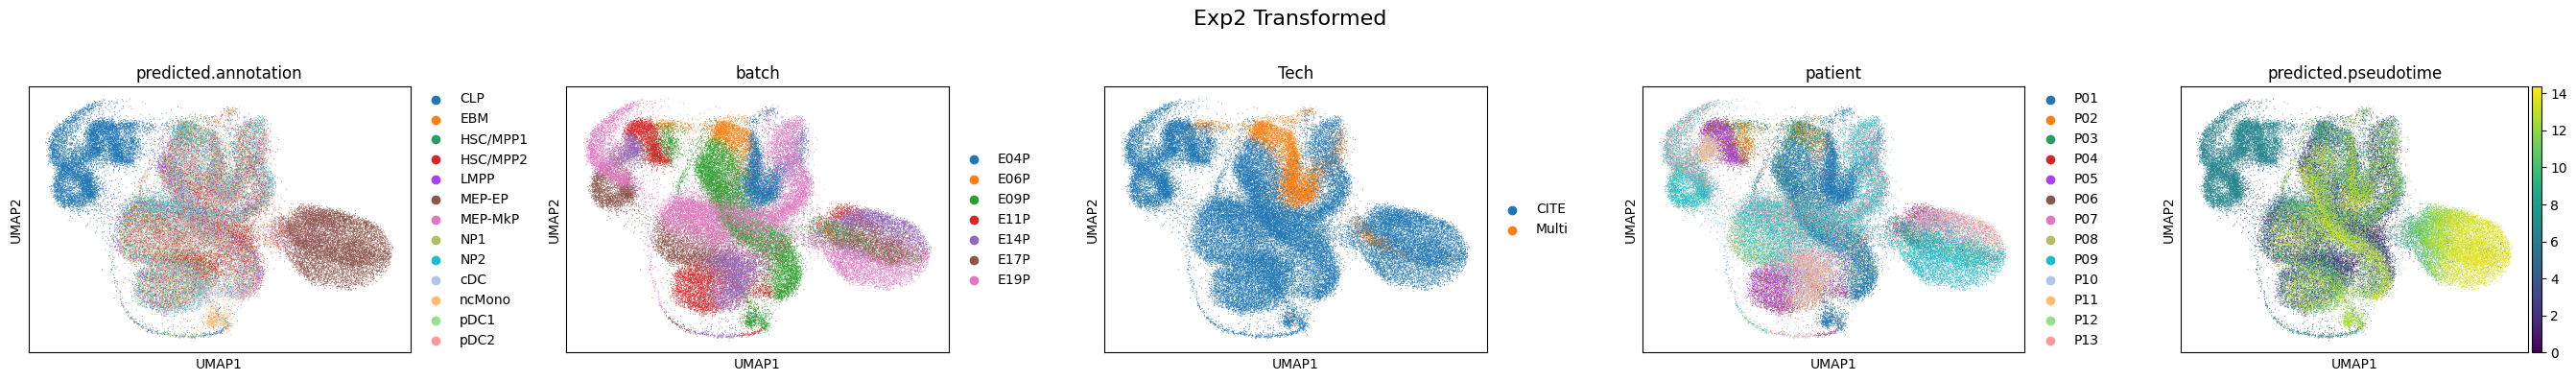

--- Processing: Exp3 Processed ---
Loading adata from: /home/minhang/mds_project/sc_classification/experiments/20250815_005818_fa_100_random_deg_weak_screen_5b5a8e81/preprocessing/adata_processed.h5ad
AnnData dimensions: (69801, 5202)
Calculating UMAP...


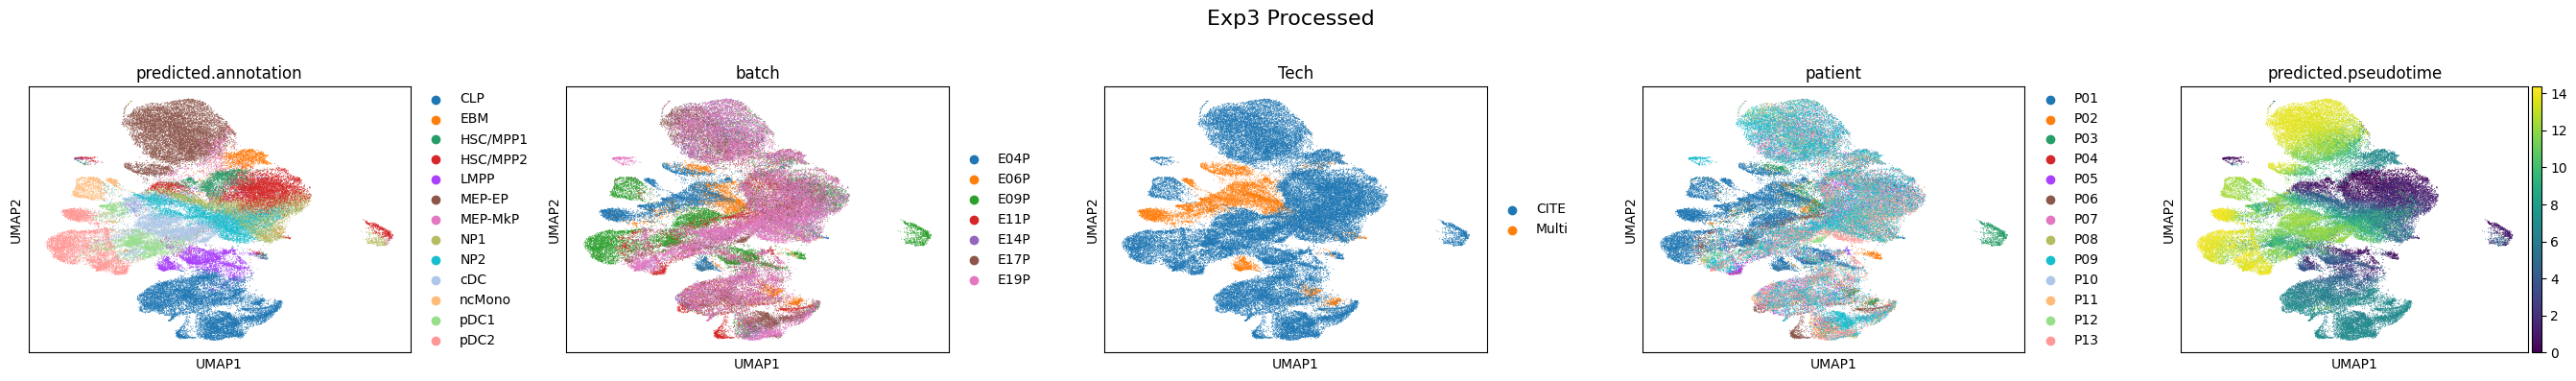

--- Processing: Exp3 Transformed ---
Loading adata from: /home/minhang/mds_project/sc_classification/experiments/20250815_005818_fa_100_random_deg_weak_screen_5b5a8e81/models/fa_100/transformed_data.h5ad
AnnData dimensions: (69801, 5202)
Calculating UMAP...


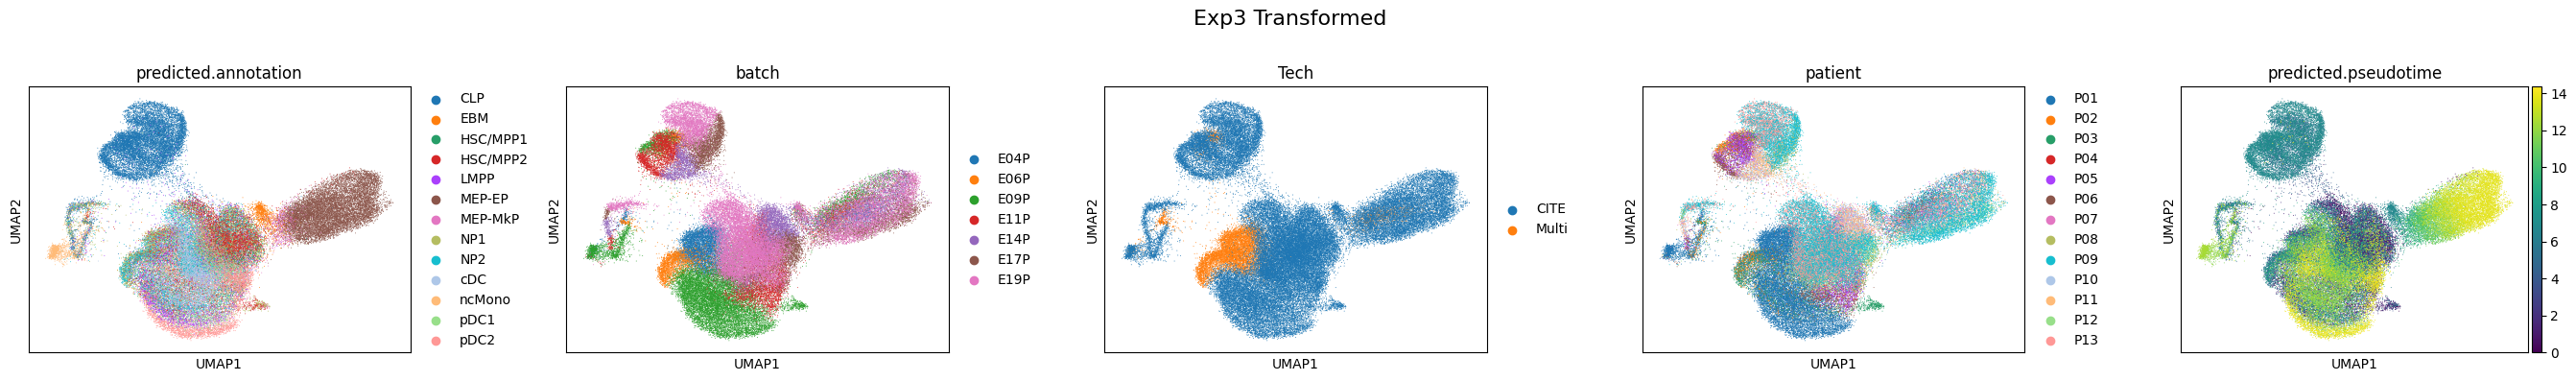

In [3]:
sc_classification_base_path = "/home/minhang/mds_project/sc_classification"
data_base_path = "/home/minhang/mds_project/data/cohort_adata"

# Dictionary of adatas to plot with their titles and paths
paths_to_plot = {
    "Input Adata": os.path.join(data_base_path, "adata_mrd_preprocessed_aug14.h5ad"),
    
    "Exp1 Processed": os.path.join(sc_classification_base_path, "experiments/20250814_221408_fa_100_none_all_filtered_394c18e2/preprocessing/adata_processed.h5ad"),
    "Exp1 Transformed": os.path.join(sc_classification_base_path, "experiments/20250814_221408_fa_100_none_all_filtered_394c18e2/models/fa_100/transformed_data.h5ad"),
    
    "Exp2 Processed": os.path.join(sc_classification_base_path, "experiments/20250815_004248_fa_100_random_all_filtered_f77df82f/preprocessing/adata_processed.h5ad"),
    "Exp2 Transformed": os.path.join(sc_classification_base_path, "experiments/20250815_004248_fa_100_random_all_filtered_f77df82f/models/fa_100/transformed_data.h5ad"),
    
    "Exp3 Processed": os.path.join(sc_classification_base_path, "experiments/20250815_005818_fa_100_random_deg_weak_screen_5b5a8e81/preprocessing/adata_processed.h5ad"),
    "Exp3 Transformed": os.path.join(sc_classification_base_path, "experiments/20250815_005818_fa_100_random_deg_weak_screen_5b5a8e81/models/fa_100/transformed_data.h5ad"),
}

# Generate plots for each adata
for title, path in paths_to_plot.items():
    plot_adata_umaps(path, title)

In [2]:
only_cite_pan_patient_adata_path = '/home/minhang/mds_project/sc_classification/experiments/20250819_232404_fa_100_random_all_filtered_f85f0e07/preprocessing/adata_processed.h5ad'
only_cite_pan_patient_adata = sc.read_h5ad(only_cite_pan_patient_adata_path)

In [3]:
print(only_cite_pan_patient_adata.obs['CN.label'].value_counts())
print(only_cite_pan_patient_adata.obs['source'].value_counts())

only_cite_pan_patient_adata.obs['marker'].value_counts()

CN.label
normal    58550
cancer     1568
Name: count, dtype: int64
source
donor        58499
recipient     1619
Name: count, dtype: int64


marker
CD34pos    60118
Name: count, dtype: int64

In [7]:
only_cite_fa_adata_path = '/home/minhang/mds_project/sc_classification/experiments/20250819_203904_fa_100_none_all_filtered_88110f26/models/fa_100/transformed_data.h5ad'
only_cite_fa_adata = sc.read_h5ad(only_cite_fa_adata_path)

In [8]:
only_cite_fa_adata.obs['Tech'].value_counts()

Tech
CITE     60118
Multi     9683
Name: count, dtype: int64

## Look at different preprocessing result
1. Low expression gene filtering with rescuing malignant enriched genes. 
2. Weak DEG screen (see volcano plot)

In [2]:
# Load the rawer adata
adata_raw_path = "/home/minhang/mds_project/data/cohort_adata/adata_mrd_preprocessed_aug14.h5ad"
adata_raw = sc.read_h5ad(adata_raw_path)

# Filter for CITE-seq technology
adata_cite = adata_raw[adata_raw.obs['Tech'] == 'CITE'].copy()

Total number of CITE-seq cells: 60118

--- Genes Expressed in Fewer Than X Cells (Absolute) ---
Genes expressed in < 10 cells: 2873
Genes expressed in < 30 cells: 6063
Genes expressed in < 50 cells: 7662
Genes expressed in < 60 cells: 8266
Genes expressed in < 80 cells: 9147
Genes expressed in < 100 cells: 9888

--- Genes Expressed in Fewer Than X% of Cells (Percentage) ---
Genes expressed in < 1.0% of cells (~601 cells): 15351
Genes expressed in < 0.5% of cells (~300 cells): 13297
Genes expressed in < 0.2% of cells (~120 cells): 10472
Genes expressed in < 0.1% of cells (~60 cells): 8266


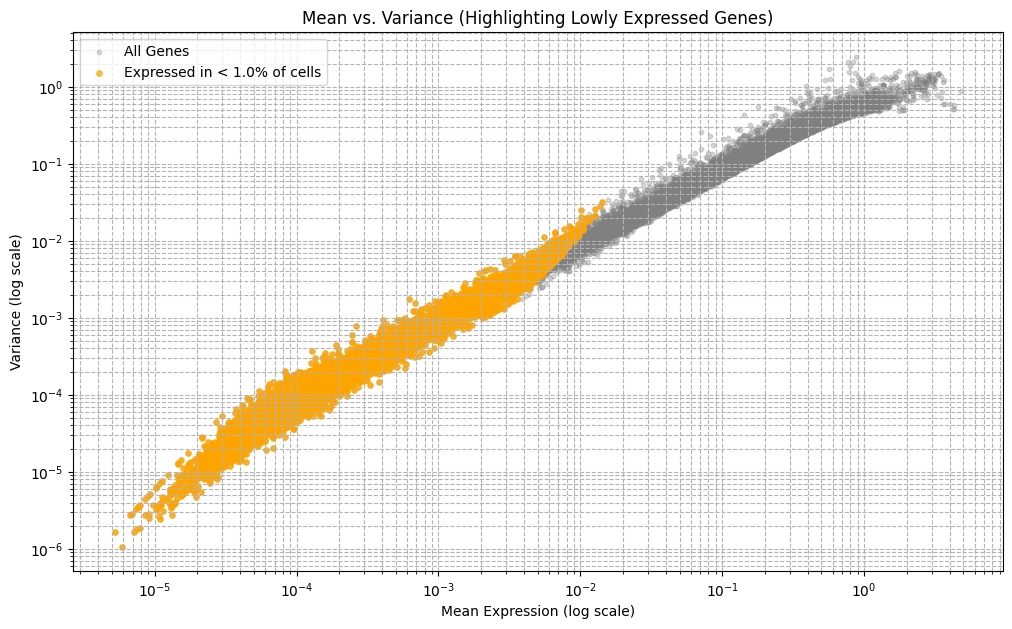

In [ ]:
# --- Calculate Mean, Variance, and Expression Counts ---
X = adata_cite.X
if sparse.issparse(X):
    expressed_counts = np.asarray((X > 0).sum(axis=0)).ravel()
    gene_means = np.asarray(X.mean(axis=0)).ravel()
    sq_means = np.asarray(X.power(2).mean(axis=0)).ravel()
    gene_vars = sq_means - np.square(gene_means)
else:
    expressed_counts = np.sum(X > 0, axis=0)
    gene_means = np.asarray(X.mean(axis=0)).ravel()
    gene_vars = np.asarray(X.var(axis=0)).ravel()

# --- Analyze Gene Expression Counts ---
n_cells = adata_cite.n_obs
print(f"Total number of CITE-seq cells: {n_cells}")

# 1. Absolute cell count thresholds
abs_thresholds = [10, 30, 50, 60, 80, 100]
print("\n--- Genes Expressed in Fewer Than X Cells (Absolute) ---")
for threshold in abs_thresholds:
    n_genes = np.sum(expressed_counts < threshold)
    print(f"Genes expressed in < {threshold} cells: {n_genes}")

# 2. Percentage cell count thresholds
pct_thresholds = [0.01, 0.005, 0.002, 0.001] # 1%, 0.5%, 0.2%, 0.1%
print("\n--- Genes Expressed in Fewer Than X% of Cells (Percentage) ---")
for pct in pct_thresholds:
    abs_equiv = int(n_cells * pct)
    n_genes = np.sum(expressed_counts < abs_equiv)
    print(f"Genes expressed in < {pct*100:.1f}% of cells (~{abs_equiv} cells): {n_genes}")

# --- Create New Visualization Highlighting Lowly Expressed Genes ---
# Using 1% as the threshold for visualization
viz_pct_threshold = 0.01
viz_abs_threshold = int(n_cells * viz_pct_threshold)
lowly_expressed_mask = expressed_counts < viz_abs_threshold

plt.figure(figsize=(12, 7))
# Plot all genes in grey
plt.scatter(gene_means, gene_vars, alpha=0.3, s=10, label='All Genes', c='gray')

# Highlight lowly expressed genes in orange
plt.scatter(gene_means[lowly_expressed_mask], gene_vars[lowly_expressed_mask], 
            alpha=0.7, s=15, label=f'Expressed in < {viz_pct_threshold*100:.1f}% of cells', c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mean Expression (log scale)")
plt.ylabel("Variance (log scale)")
plt.title(f"Mean vs. Variance (Highlighting Lowly Expressed Genes)")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()



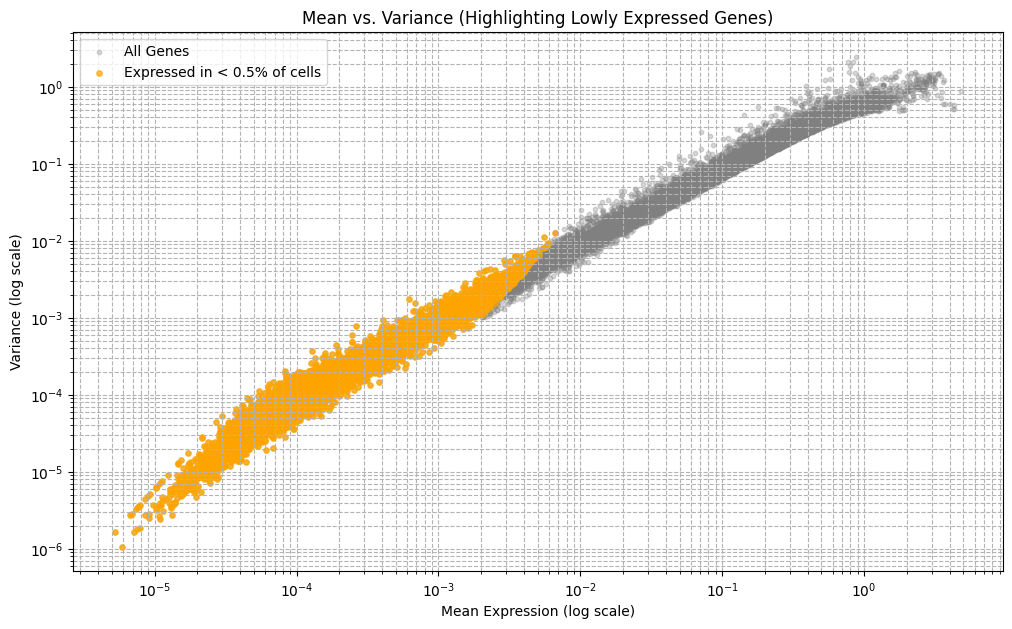

In [11]:
viz_pct_threshold = 0.005
viz_abs_threshold = int(n_cells * viz_pct_threshold)
lowly_expressed_mask = expressed_counts < viz_abs_threshold

plt.figure(figsize=(12, 7))
# Plot all genes in grey
plt.scatter(gene_means, gene_vars, alpha=0.3, s=10, label='All Genes', c='gray')

# Highlight lowly expressed genes in orange
plt.scatter(gene_means[lowly_expressed_mask], gene_vars[lowly_expressed_mask], 
            alpha=0.7, s=15, label=f'Expressed in < {viz_pct_threshold*100:.1f}% of cells', c='orange')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mean Expression (log scale)")
plt.ylabel("Variance (log scale)")
plt.title(f"Mean vs. Variance (Highlighting Lowly Expressed Genes)")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

Running DEG analysis (Wilcoxon rank-sum test)...
Constructing results DataFrame...

--- Analysis with Relaxed Thresholds ---
P-value threshold (adjusted): 0.1
Log Fold Change threshold (absolute): 0.05
Number of genes passing relaxed criteria: 7126

Generating custom volcano plot with labels...


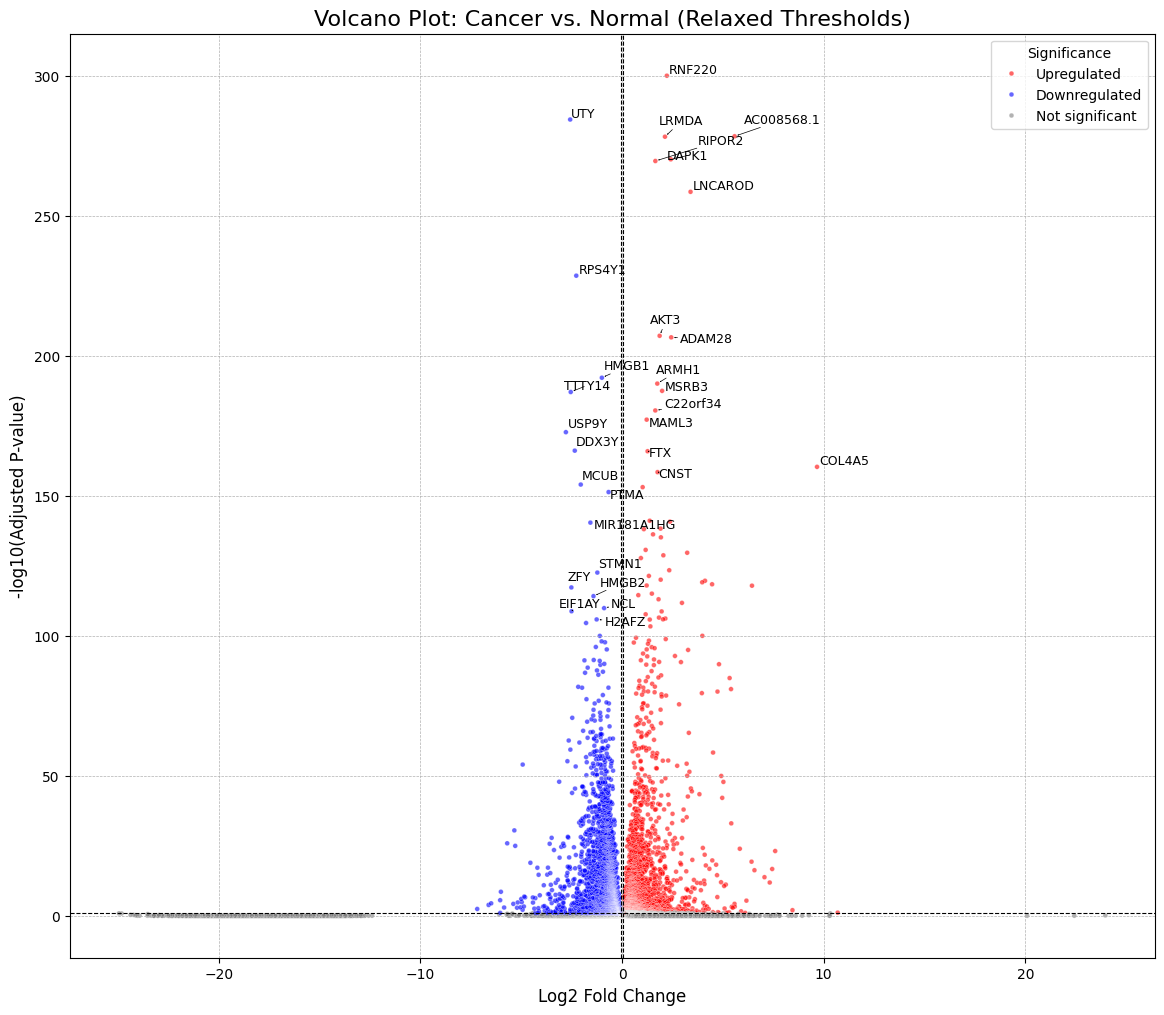

In [16]:
# --- Exploratory Analysis for Relaxed Weak DEG Screen ---
import pandas as pd
import seaborn as sns
from adjustText import adjust_text

# Ensure we are using the CITE-seq only data
adata_cite = adata_raw[adata_raw.obs['Tech'] == 'CITE'].copy()

# --- Run DEG Analysis ---
print("Running DEG analysis (Wilcoxon rank-sum test)...")
# Note: This performs the test on all genes, which can be slow.
sc.tl.rank_genes_groups(adata_cite, groupby='CN.label', groups=['cancer'], reference='normal',
                          method='wilcoxon', use_raw=False, n_genes=adata_cite.n_vars)

# --- Construct Results DataFrame ---
print("Constructing results DataFrame...")
rank_genes_results = adata_cite.uns['rank_genes_groups']
results_df = pd.DataFrame({
    'names': rank_genes_results['names']['cancer'],
    'logfoldchanges': rank_genes_results['logfoldchanges']['cancer'],
    'pvals': rank_genes_results['pvals']['cancer'],
    'pvals_adj': rank_genes_results['pvals_adj']['cancer']
})

# --- Analyze Genes Passing Relaxed Threshold ---
pval_thresh = 0.1
lfc_thresh = 0.05
passing_genes_mask = (results_df['pvals_adj'] < pval_thresh) & (results_df['logfoldchanges'].abs() > lfc_thresh)
n_passing_genes = passing_genes_mask.sum()

print(f"\n--- Analysis with Relaxed Thresholds ---")
print(f"P-value threshold (adjusted): {pval_thresh}")
print(f"Log Fold Change threshold (absolute): {lfc_thresh}")
print(f"Number of genes passing relaxed criteria: {n_passing_genes}")

# --- Custom Volcano Plot ---
print("\nGenerating custom volcano plot with labels...")
pvals_adj = results_df['pvals_adj']
pvals_log10 = -np.log10(pvals_adj.replace(0, 1e-300))
results_df['pvals_log10'] = pvals_log10

results_df['significant'] = 'Not significant'
results_df.loc[(results_df['logfoldchanges'] > lfc_thresh) & (pvals_adj < pval_thresh), 'significant'] = 'Upregulated'
results_df.loc[(results_df['logfoldchanges'] < -lfc_thresh) & (pvals_adj < pval_thresh), 'significant'] = 'Downregulated'

plt.figure(figsize=(14, 12))
sns.scatterplot(
    x='logfoldchanges',
    y='pvals_log10',
    data=results_df,
    hue='significant',
    hue_order=['Upregulated', 'Downregulated', 'Not significant'],
    palette={'Upregulated': 'red', 'Downregulated': 'blue', 'Not significant': 'grey'},
    s=12, alpha=0.6
)

n_top_genes = 15
top_up = results_df[results_df['significant'] == 'Upregulated'].sort_values('pvals_adj', ascending=True).head(n_top_genes)
top_down = results_df[results_df['significant'] == 'Downregulated'].sort_values('pvals_adj', ascending=True).head(n_top_genes)
genes_to_label = pd.concat([top_up, top_down])

texts = []
for index, row in genes_to_label.iterrows():
    texts.append(plt.text(row['logfoldchanges'], row['pvals_log10'], row['names'], size=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

plt.title('Volcano Plot: Cancer vs. Normal (Relaxed Thresholds)', fontsize=16)
plt.xlabel('Log2 Fold Change', fontsize=12)
plt.ylabel('-log10(Adjusted P-value)', fontsize=12)
plt.axvline(lfc_thresh, color='black', linestyle='--', linewidth=0.8)
plt.axvline(-lfc_thresh, color='black', linestyle='--', linewidth=0.8)
plt.axhline(-np.log10(pval_thresh), color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Significance')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()



Identified 15351 genes expressed in < 1.0% of cells (~601 cells).


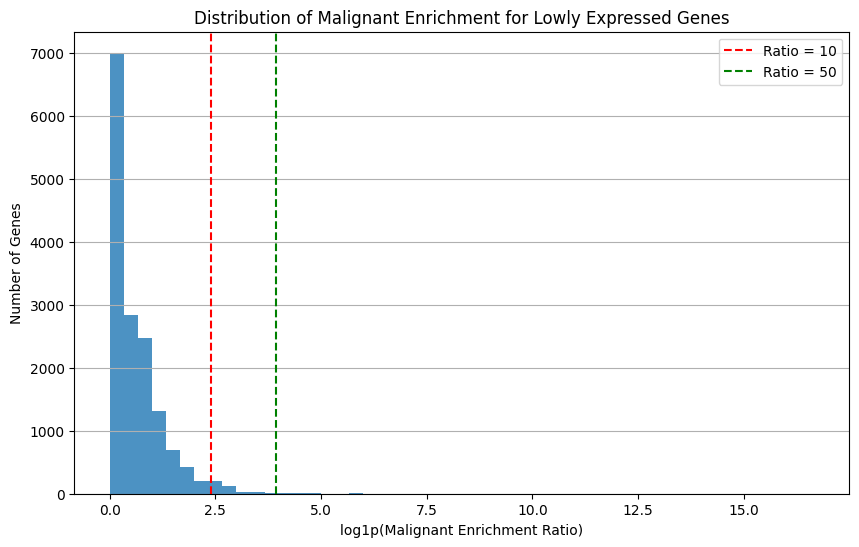


Enrichment Ratio Statistics for Lowly Expressed Genes:
count    1.535100e+04
mean     1.622131e+03
std      1.485581e+05
min      0.000000e+00
25%      0.000000e+00
50%      5.334361e-01
75%      1.400270e+00
max      1.721939e+07
dtype: float64

Number of genes with enrichment ratio > 10: 353
Number of genes with enrichment ratio > 50: 43
Number of genes with enrichment ratio > 100: 19


In [ ]:
# --- Exploratory Analysis for Malignant-Specific Gene Filtering ---

# Ensure we are using the CITE-seq only data
adata_cite = adata_raw[adata_raw.obs['Tech'] == 'CITE'].copy()
X = adata_cite.X
n_cells_cite = adata_cite.n_obs

# Define the low-expression filter threshold
low_expr_pct = 0.01
low_expr_abs_count = int(n_cells_cite * low_expr_pct)

# Get the mask for lowly expressed genes
if sparse.issparse(X):
    expressed_counts = np.asarray((X > 0).sum(axis=0)).ravel()
else:
    expressed_counts = np.sum(X > 0, axis=0)
lowly_expressed_gene_mask = expressed_counts < low_expr_abs_count
lowly_expressed_gene_names = adata_cite.var_names[lowly_expressed_gene_mask]

print(f"Identified {len(lowly_expressed_gene_names)} genes expressed in < {low_expr_pct*100:.1f}% of cells (~{low_expr_abs_count} cells).")

# --- Calculate Malignant Enrichment Ratio for these genes ---
adata_low_expr = adata_cite[:, lowly_expressed_gene_names].copy()
X_low = adata_low_expr.X

# Get masks for malignant and normal cells
malignant_mask = adata_low_expr.obs['CN.label'] == 'cancer'
normal_mask = adata_low_expr.obs['CN.label'] == 'normal'

n_malignant = np.sum(malignant_mask)
n_normal = np.sum(normal_mask)

# Calculate proportion of cells expressing each gene, separated by cell type
if sparse.issparse(X_low):
    expressed_in_malignant = np.asarray((X_low[malignant_mask, :] > 0).sum(axis=0)).ravel()
    expressed_in_normal = np.asarray((X_low[normal_mask, :] > 0).sum(axis=0)).ravel()
else:
    expressed_in_malignant = np.sum(X_low[malignant_mask, :] > 0, axis=0)
    expressed_in_normal = np.sum(X_low[normal_mask, :] > 0, axis=0)

prop_malignant = expressed_in_malignant / n_malignant
prop_normal = expressed_in_normal / n_normal

# Calculate enrichment ratio, adding a small epsilon to avoid division by zero
epsilon = 1e-9
enrichment_ratio = prop_malignant / (prop_normal + epsilon)

# --- Visualize the Distribution of Enrichment Ratios ---
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(enrichment_ratio), bins=50, alpha=0.8)
plt.xlabel("log1p(Malignant Enrichment Ratio)")
plt.ylabel("Number of Genes")
plt.title(f"Distribution of Malignant Enrichment for Lowly Expressed Genes")
plt.axvline(np.log1p(10), color='r', linestyle='--', label='Ratio = 10')
plt.axvline(np.log1p(50), color='g', linestyle='--', label='Ratio = 50')
plt.legend()
plt.grid(axis='y')
plt.show()

# Print summary statistics
print("\nEnrichment Ratio Statistics for Lowly Expressed Genes:")
print(pd.Series(enrichment_ratio).describe())

print(f"\nNumber of genes with enrichment ratio > 10: {np.sum(enrichment_ratio > 10)}")
print(f"Number of genes with enrichment ratio > 50: {np.sum(enrichment_ratio > 50)}")
print(f"Number of genes with enrichment ratio > 100: {np.sum(enrichment_ratio > 100)}")



--- Cell Type Composition in Cancer vs. Normal (CITE-seq) ---

Absolute cell counts:
CN.label              cancer  normal
predicted.annotation                
CLP                        3   12178
EBM                       20    1346
HSC/MPP1                 175    1657
HSC/MPP2                 643    5984
LMPP                     175    3037
MEP-EP                    21   10512
MEP-MkP                   77     792
NP1                      286    4363
NP2                       44    4646
cDC                       82    5321
ncMono                     6    1067
pDC1                      20    3051
pDC2                      16    4596

Proportion of cells within each group (%):
CN.label              cancer  normal
predicted.annotation                
CLP                     0.19   20.80
EBM                     1.28    2.30
HSC/MPP1               11.16    2.83
HSC/MPP2               41.01   10.22
LMPP                   11.16    5.19
MEP-EP                  1.34   17.95
MEP-MkP             

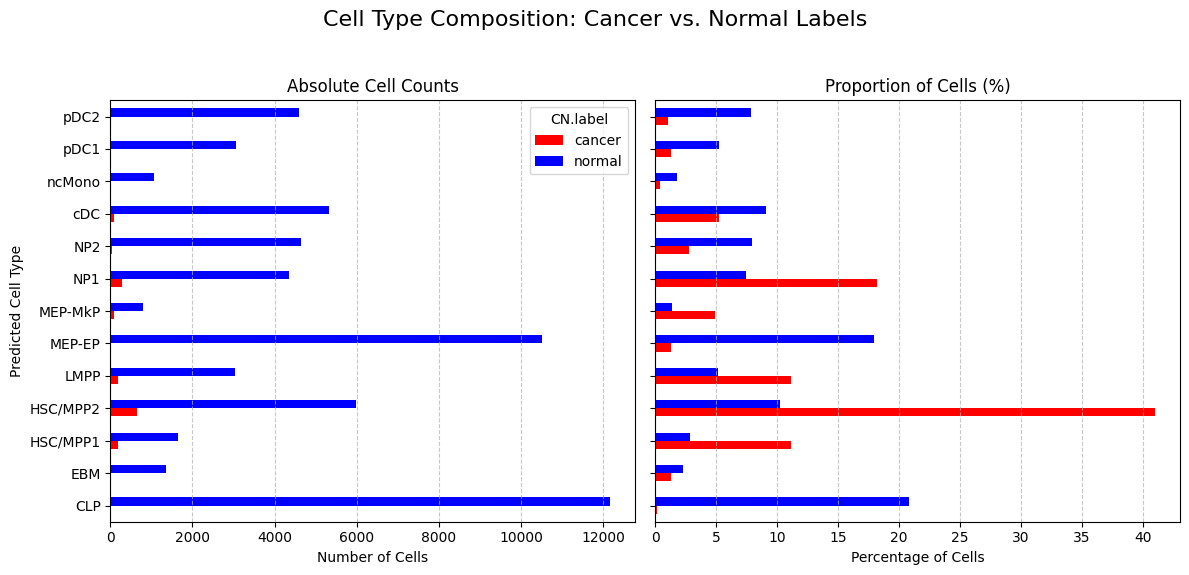

In [4]:
# --- Cell Type Composition Analysis ---
# Check if 'predicted.annotation' is available
if 'predicted.annotation' in adata_cite.obs.columns:
    print("--- Cell Type Composition in Cancer vs. Normal (CITE-seq) ---")
    
    # Create a cross-tabulation
    composition_table = pd.crosstab(adata_cite.obs['predicted.annotation'], adata_cite.obs['CN.label'])
    
    print("\nAbsolute cell counts:")
    print(composition_table)
    
    # Normalize to see proportions
    composition_prop = composition_table.div(composition_table.sum(axis=0), axis=1)
    
    print("\nProportion of cells within each group (%):")
    print((composition_prop * 100).round(2))
    
    # --- Visualization ---
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    # Define colors
    plot_colors = {'cancer': 'red', 'normal': 'blue'}
    
    # Absolute counts plot
    composition_table.plot(kind='barh', ax=ax[0], legend=True, color=[plot_colors.get(c, '#333333') for c in composition_table.columns])
    ax[0].set_title('Absolute Cell Counts')
    ax[0].set_xlabel('Number of Cells')
    ax[0].set_ylabel('Predicted Cell Type')
    ax[0].grid(axis='x', linestyle='--', alpha=0.7)
    
    # Proportions plot
    (composition_prop * 100).plot(kind='barh', ax=ax[1], legend=False, color=[plot_colors.get(c, '#333333') for c in composition_prop.columns])
    ax[1].set_title('Proportion of Cells (%)')
    ax[1].set_xlabel('Percentage of Cells')
    ax[1].set_ylabel('')
    ax[1].grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.suptitle('Cell Type Composition: Cancer vs. Normal Labels', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("'predicted.annotation' column not found in adata_cite.obs.")

